In [1]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator

import matplotlib.pyplot as plt


In [2]:
isu_mask = np.array(Image.open("Documents/ISU_logo.png"))
image_colors = ImageColorGenerator(isu_mask)

In [3]:
isu_mask[isu_mask == 0] = 255


In [4]:
df = pd.read_csv('Documents/safetycounts.csv', encoding = "ISO-8859-1")

In [5]:
#creating function to multiply the words by the counts in their count column
def multiply(df, count_column):    
    for _, row in df.iterrows():
        #iterating over the rows
        for i in range(int(row[count_column])-1):
            # Appending the row to the end of the dataframe for the # in count_column
            df = df.append(row)

    column_count_removed = [x for x in df.columns if x != count_column]
    df = df[column_count_removed]
    return df

In [6]:
df_dup = multiply(df, 'Count')


In [7]:
df4 = " ".join(x for x in df_dup.Word)


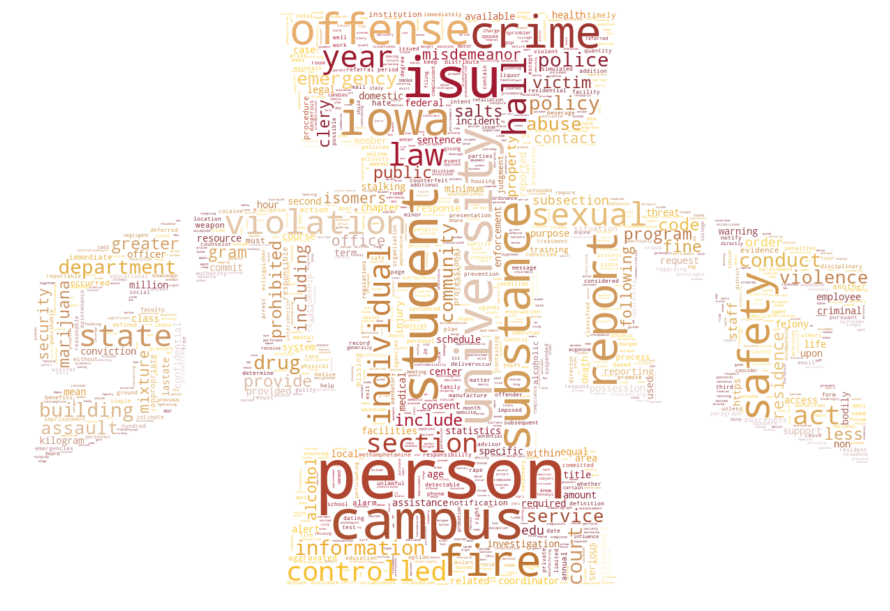

In [8]:
wordcloud = WordCloud(width=800, height=800, max_font_size=100, max_words=3817, mode="RGBA",mask=isu_mask, background_color="white",collocations=False).generate(str(df4))


plt.figure(figsize=[15,15])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis("off")

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()